## importing python libraries

In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import face_recognition
import keras
from keras.models import load_model
import cv2


In [26]:
!pip freeze> requirements.txt

You are using pip version 9.0.3, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Face Detection

### Sample Image

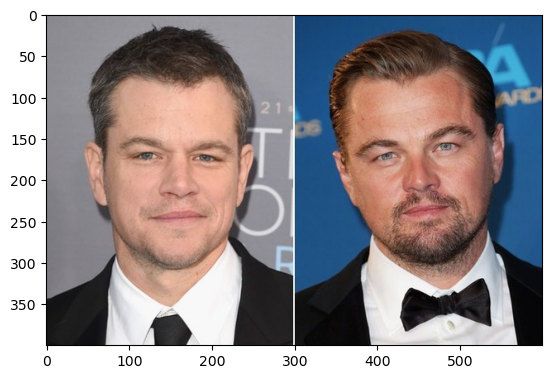

In [2]:
image1 = Image.open("../test_images/040wrmpyTF5l.jpg")
image_array1 = np.array(image1)
plt.imshow(image_array1)

## Face Detection

### Detecting the location of faces from a given image using face_recognition library

In [3]:
image = face_recognition.load_image_file("../test_images/040wrmpyTF5l.jpg")

face_locations = face_recognition.face_locations(image)

#### A list of tuples of found face locations in (top, right, bottom, left) order

In [4]:
face_locations

[(133, 236, 288, 81), (116, 528, 270, 373)]

#### Taking the first face detected from image and plotting it

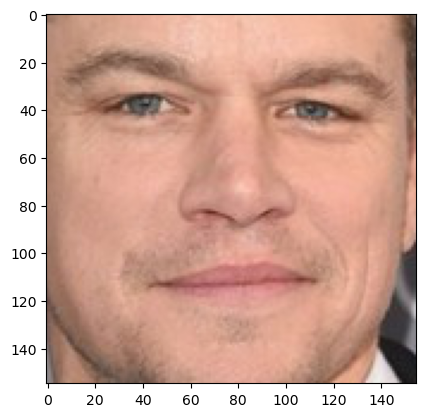

In [5]:
top, right, bottom, left = face_locations[0]
face_image1 = image[top:bottom, left:right]
plt.imshow(face_image1)
image_save = Image.fromarray(face_image1)
image_save.save("image_1.jpg")

#### Taking the second face detected from image and plotting it

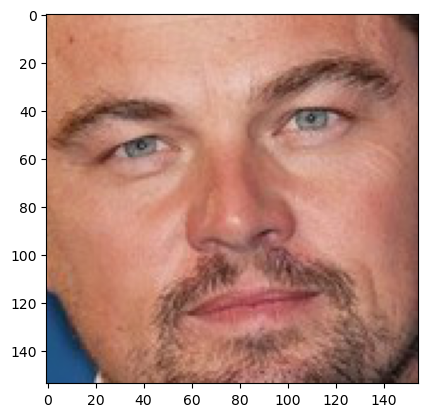

In [6]:
top, right, bottom, left = face_locations[1]
face_image2 = image[top:bottom, left:right]
plt.imshow(face_image2)
image_save = Image.fromarray(face_image2)
image_save.save("image_2.jpg")

## Face Recognition

### Image1

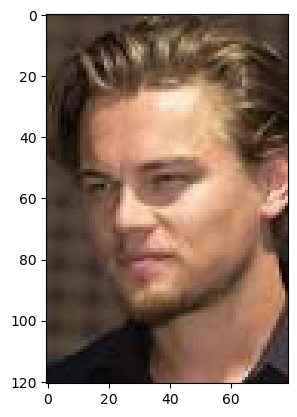

In [7]:
image1 = Image.open("../test_images/index2.jpeg")
image_array1 = np.array(image1)
plt.imshow(image_array1)

### Image2

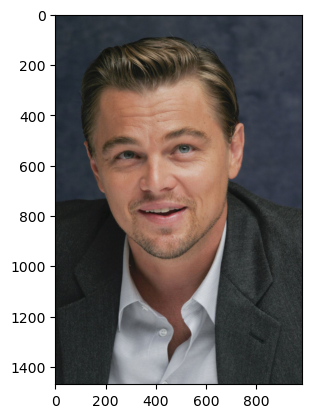

In [8]:
image2 = Image.open("../test_images/index1.jpg")
image_array2 = np.array(image2)
plt.imshow(image_array2)

### find the face encoding for Image1 and Image2 which is of same person with different pose and compare them to find if they are recognized as same

In [10]:
image1 = face_recognition.load_image_file("../test_images/index1.jpg")
image2 = face_recognition.load_image_file("../test_images/index2.jpeg")
 
encoding_1 = face_recognition.face_encodings(image1)[0]

encoding_2 = face_recognition.face_encodings(image1)[0]

results = face_recognition.compare_faces([encoding_1], encoding_2,tolerance=0.50)


### the result of the above comparison returns "True" stating that two images having different pose are recognized as same

In [13]:
print(results)

[True]


### the same is done for Image1 and Image3 which are the images of two persons and the result returned after comparison is "False" denoting the two images are not recognized as same

In [14]:
image1 = face_recognition.load_image_file("../test_images/index1.jpg")
image2 = face_recognition.load_image_file("../test_images/rajeev.jpg")
 
encoding_1 = face_recognition.face_encodings(image1)[0]

encoding_2 = face_recognition.face_encodings(image2)[0]

results = face_recognition.compare_faces([encoding_1], encoding_2,tolerance=0.50)


In [15]:
results

[False]

## Emotion detection

In [16]:
emotion_dict= {'Angry': 0, 'Sad': 5, 'Neutral': 4, 'Disgust': 1, 'Surprise': 6, 'Fear': 2, 'Happy': 3}

### Reading a sample image 

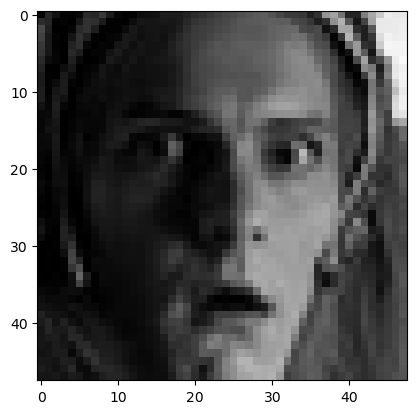

In [17]:
face_image  = cv2.imread("../test_images/39.jpg")
plt.imshow(face_image)

### The label of this image is "Surprise"

In [19]:
face_image.shape

(48, 48, 3)

In [204]:
# image = face_recognition.load_image_file("./fer2013/train/Angry/38.jpg")
# face_locations = face_recognition.face_locations(face_image)
# top, right, bottom, left = face_locations[0]
# face_image = face_image[top:bottom, left:right]
# plt.imshow(face_image)

In [20]:
# resizing the image
face_image = cv2.resize(face_image, (48,48))
face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
face_image = np.reshape(face_image, [1, face_image.shape[0], face_image.shape[1], 1])



### Load the model trained for detecting emotions of a face

In [21]:
model = load_model("../emotion_detector_models/model_v6_23.hdf5")

/Users/kavindulakshitha/Developer/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Kernel shape must have the same length as input, but received kernel of shape (3, 3, 1, 32) and input of shape (None, None, 48, 48, 1).

In [22]:
print face_image.shape

(1, 48, 48, 1)


In [23]:
predicted_class = np.argmax(model.predict(face_image))

### Predicted label

In [24]:

label_map = dict((v,k) for k,v in emotion_dict.items()) 
predicted_label = label_map[predicted_class]

In [25]:
print(predicted_label)

Surprise
